# Customer Churn Project

In [1]:
# Importing necessary libraries for data analysis, manipulation, and visualization
import numpy as np           # For numerical operations, especially with arrays
import pandas as pd          # For data manipulation and analysis, particularly using dataframes
import matplotlib.pyplot as plt  # For creating visualizations like charts and graphs
import seaborn as sns        # For making statistical graphics based on Matplotlib


In [2]:
# Importing the files module from Google Colab to enable file upload functionality.
from google.colab import files

# This line opens a file upload dialog for the user to select files to upload.
uploaded = files.upload()

# After uploading, you can read the file
df = pd.read_csv('customer_churn.csv') # Loading the data into a dataframe named 'df'

Saving customer_churn.csv to customer_churn.csv


In [3]:
# Display the first few rows of the dataframe to get an initial view of the data
df.head()  # Shows the first 5 rows of the dataframe.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Configure pandas to display all columns in the output
pd.set_option('display.max_columns', None)  # Ensures all columns are visible when printing

In [5]:
# Displaying the first five rows of the DataFrame df to check the data.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Get the dimensions of the dataframe (rows, columns)
df.shape  # Returns a tuple representing the shape of the dataframe (number of rows, number of columns)

(7043, 21)

In [7]:
# Display information about the dataframe, including data types and non-null counts
df.info()  # Provides a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Convert the 'TotalCharges' column to numeric, coercing errors to NaN (useful if the column has non-numeric values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Converts the column to numeric

In [9]:
# Display dataframe information again to see the effect of the previous operation
df.info()  # Check if 'TotalCharges' was successfully converted to numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Get descriptive statistics for the numerical columns in the dataframe
df.describe()  # Provides summary statistics like mean, median, etc., for numeric columns

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Checking Null Values

In [11]:
# Check for missing values in the dataframe
df.isnull().sum()  # Returns the number of missing values in each column

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
# Calculate the percentage of missing values in the 'TotalCharges' column
11 / 7043 * 100  # Calculate percentage of missing values in 'TotalCharges'

0.1561834445548772

In [13]:
# Drop rows with any missing values from the dataframe
df.dropna(inplace=True)  # Removes rows with missing data to ensure clean data for analysis

In [14]:
# Confirm that there are no missing values left in the dataframe
df.isnull().sum()  # Double-checks if any missing values remain

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### Checking Duplicates

In [15]:
# Check for duplicate rows in the dataframe
df.duplicated().sum()  # Returns the number of duplicate rows, if any

0

### Checking Outliers

<Axes: xlabel='tenure'>

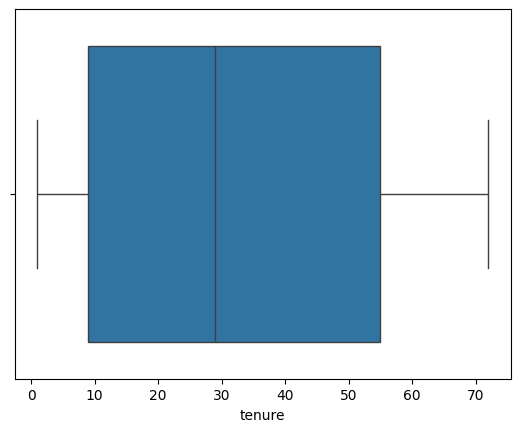

In [16]:
# Visualize the distribution of the 'tenure' column using a boxplot
sns.boxplot(data=df, x='tenure')  # Creates a boxplot to visualize the distribution of 'tenure'

In [17]:
# List all columns in the dataframe
df.columns  # Returns the names of all columns in the dataframe


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

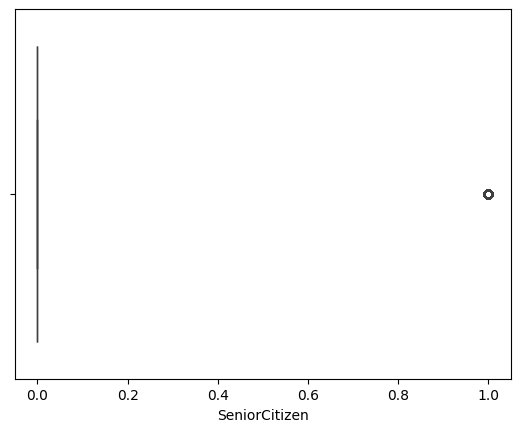

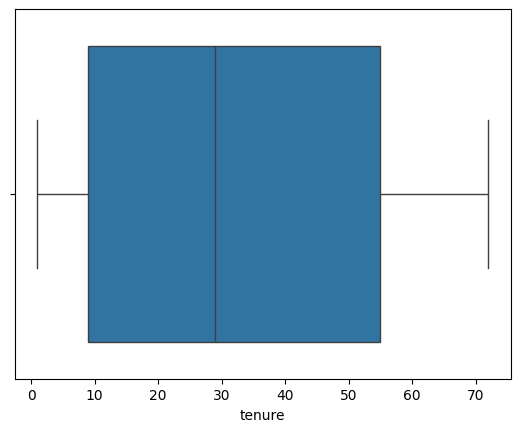

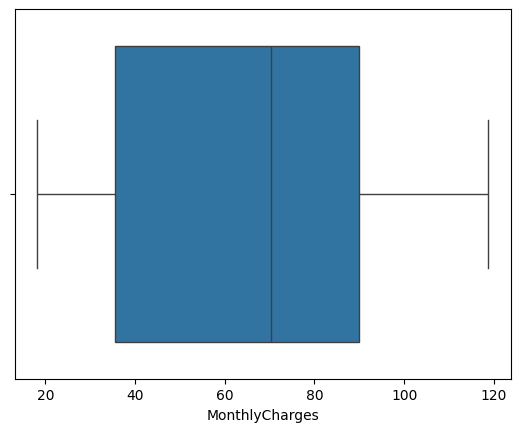

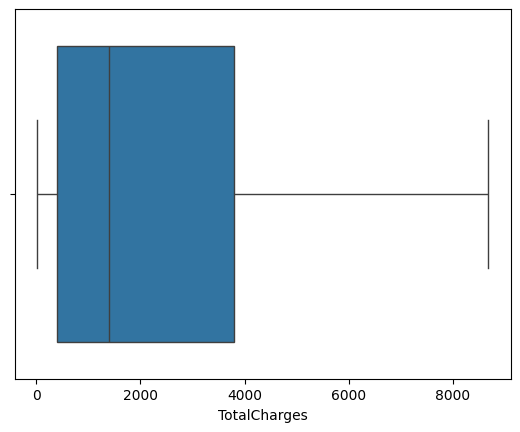

In [18]:
# Loop through each column in the dataframe to create a boxplot if the column is numerical
for i in df.columns:
    if df[i].dtype != 'object':  # Checks if the column is not categorical
        sns.boxplot(data=df, x=df[i])  # Creates a boxplot for the numerical column
        plt.show()  # Displays the plot


### Checking Correlations

In [19]:
# Single correlation
# Multicorrelation -> include categorical variables

In [20]:
# Calculate the correlation between numerical columns
df.corr(numeric_only=True)  # Computes pairwise correlation of numeric columns

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<Axes: >

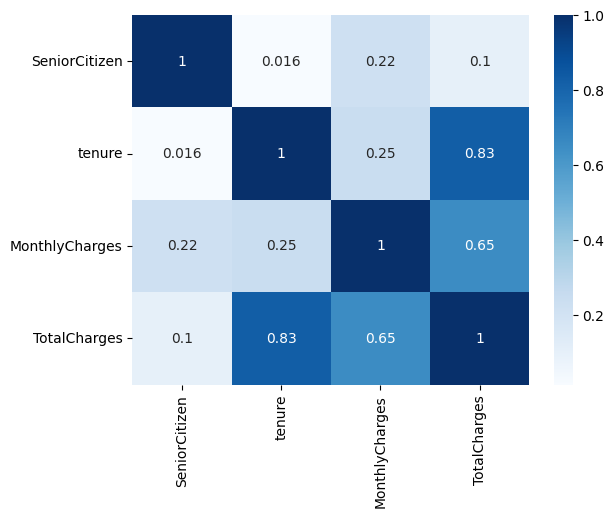

In [21]:
# Visualize the correlation matrix using a heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')  # Creates a heatmap with annotations

In [22]:
# Dropping the 'tenure' column from the DataFrame, due to high correlation with other features.
df.drop('tenure',axis=1, inplace=True) # Removes the 'tenure' column from the dataframe

<Axes: >

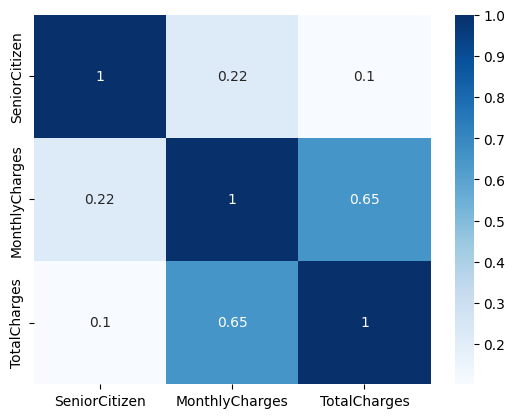

In [23]:
# Visualize the updated correlation matrix without 'tenure'
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')  # Creates a heatmap for the new correlation matrix

### Encoding Data

In [24]:
# Import LabelEncoder to convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  # Creates an instance of LabelEncoder


In [25]:
# Display the first few rows of the dataframe
df.head()  # Shows the first 5 rows of the dataframe

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
# Encode the 'InternetService' column, converting categories into numbers
df['InternetService'] = le.fit_transform(df['InternetService'])  # Converts 'InternetService' categories to numbers

In [27]:
# Display the first few rows of the encoded 'InternetService' column
df['InternetService'].head()  # Shows the first 5 values of the encoded 'InternetService' column

,InternetService
0,0
1,0
2,0
3,0
4,1


In [30]:
# Loop through each column and encode it if it contains categorical data
for i in df.columns:
    if df[i].dtype == 'object': # Checks if the column is categorical
      df[i] = le.fit_transform(df[i])

In [31]:
# Display the dataframe information to check the changes
df.info()  # Shows the structure of the dataframe, including data types

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   int64  
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

In [32]:
# Display the first few rows of the dataframe after encoding
df.head()  # Shows the first 5 rows of the updated dataframe

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [33]:
# Drop the 'customerID' column as it is not useful for the analysis
df.drop('customerID', axis=1, inplace=True)  # Removes the 'customerID' column

In [34]:
# Analyzing multicollinearity using Variance Inflation Factor (VIF)
# Import VIF calculation module from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
# Define the feature set (excluding the target variable 'Churn')
x = df.drop('Churn', axis=1)  # Creates a new dataframe with all features except 'Churn'

In [36]:
# Displaying the final DataFrame x after all modifications.
x

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [37]:
# Define the target variable
y = df['Churn']  # Defines 'Churn' as the target variable

In [38]:
# Create a dataframe to hold VIF values
vif_data = pd.DataFrame()  # Creates an empty dataframe for VIF values
vif_data['Columns'] = x.columns  # Adds a column with the names of the features
vif_data['VIF value'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]  # Calculates VIF for each feature
vif_data  # Displays the VIF values

,Columns,VIF value
0,gender,1.928012
1,SeniorCitizen,1.362305
2,Partner,2.749816
3,Dependents,1.956119
4,PhoneService,14.683342
5,MultipleLines,2.697814
6,InternetService,4.328137
7,OnlineSecurity,2.231907
8,OnlineBackup,2.441994
9,DeviceProtection,2.627763


In [39]:
# Drop 'MonthlyCharges' to reduce multicollinearity and re-calculate VIF
x.drop('MonthlyCharges', axis=1, inplace=True)  # Removes 'MonthlyCharges' from the feature set
vif_data = pd.DataFrame()  # Creates a new empty dataframe for VIF values
vif_data['Columns'] = x.columns  # Adds a column with the names of the remaining features
vif_data['VIF value'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]  # Re-calculates VIF
vif_data  # Displays the updated VIF values

,Columns,VIF value
0,gender,1.919674
1,SeniorCitizen,1.341260
2,Partner,2.749816
3,Dependents,1.955831
4,PhoneService,8.200629
5,MultipleLines,2.499564
6,InternetService,3.491818
7,OnlineSecurity,2.228559
8,OnlineBackup,2.441964
9,DeviceProtection,2.617616


In [40]:
# Drop 'PhoneService' to further reduce multicollinearity and re-calculate VIF
x.drop('PhoneService', axis=1, inplace=True)  # Removes 'PhoneService' from the feature set
vif_data = pd.DataFrame()  # Creates another empty dataframe for VIF values
vif_data['Columns'] = x.columns  # Adds a column with the names of the remaining features
vif_data['VIF value'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]  # Re-calculates VIF again
vif_data  # Displays the final VIF values after dropping features

,Columns,VIF value
0,gender,1.864278
1,SeniorCitizen,1.336778
2,Partner,2.739901
3,Dependents,1.949167
4,MultipleLines,2.492203
5,InternetService,2.529810
6,OnlineSecurity,2.196135
7,OnlineBackup,2.437734
8,DeviceProtection,2.616390
9,TechSupport,2.357595


In [41]:
# Displaying the final DataFrame x after all modifications.
x

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,0,0,2,0,2,0,0,0,1,0,3,1889.50
2,1,0,0,0,0,0,2,2,0,0,0,0,0,1,3,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1840.75
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,2,0,2,2,2,2,1,1,3,1990.50
7039,0,0,1,1,2,1,0,2,2,0,2,2,1,1,1,7362.90
7040,0,0,1,1,1,0,2,0,0,0,0,0,0,1,2,346.45
7041,1,1,1,0,2,1,0,0,0,0,0,0,0,1,3,306.60


### ML Model Building

In [42]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=100)  # 75% of data for training, 25% for testing

### Logistic Regression Model

In [43]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
lo_model = LogisticRegression()  # Creates an instance of LogisticRegression
lo_model.fit(x_train, y_train)  # Fits the model to the training data

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
# Make predictions on the test set using the Logistic Regression model
y_test_lo = lo_model.predict(x_test)  # Predicts the target variable on the test data

In [45]:
# Compare predictions with actual outcomes
y_test  # Displays the actual target values for the test set

,Churn
942,0
3730,1
1761,0
2283,1
1872,0
...,...
1848,0
5925,0
3603,1
6747,0


In [46]:
# Calculate and display the accuracy of the Logistic Regression model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_lo)  # Computes the accuracy of the model

0.767349260523322

### Decision Tree Model

In [47]:
# Train a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()  # Creates an instance of DecisionTreeClassifier
dt_model.fit(x_train, y_train)  # Fits the model to the training data

DecisionTreeClassifier()

In [48]:
# Make predictions on the test set using the Decision Tree Classifier
y_pred_dt = dt_model.predict(x_test)  # Predicts the target variable on the test data

In [49]:
# Calculate and display the accuracy of the Decision Tree Classifier
accuracy_score(y_test, y_pred_dt)  # Computes the accuracy of the Decision Tree model

0.7303754266211604

### Random Forest Model

In [50]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()  # Creates an instance of RandomForestClassifier
rf_model.fit(x_train, y_train)  # Fits the model to the training data

RandomForestClassifier()

In [51]:
# Make predictions on the test set using the Random Forest Classifier
y_pred_rf = rf_model.predict(x_test)  # Predicts the target variable on the test data

In [52]:
# Calculate and display the accuracy of the Random Forest Classifier
accuracy_score(y_test, y_pred_rf)  # Computes the accuracy of the Random Forest model

0.7679180887372014